In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis=1) ##inplace = True
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


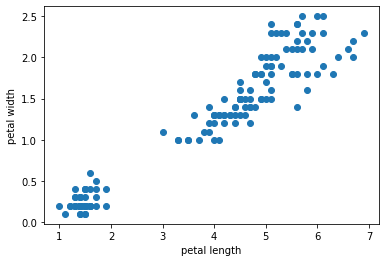

In [20]:
import matplotlib.pyplot as plt
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [21]:
km = KMeans(n_clusters = 3)
km.fit(df)
y_predicted = km.predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

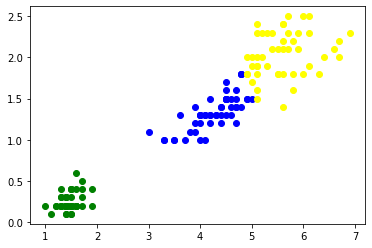

In [25]:
df['cluster'] = y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

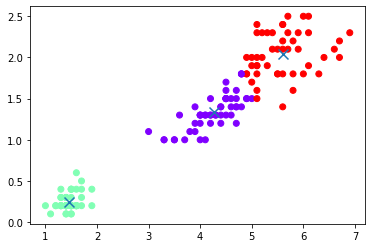

In [34]:
cluster_centers = km.cluster_centers_
plt.scatter(df['petal length (cm)'],df['petal width (cm)'], c=y_predicted, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cmap='rainbow', marker='x', s=100)


C:\Users\vinod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


NameError: name 'addlabels' is not defined

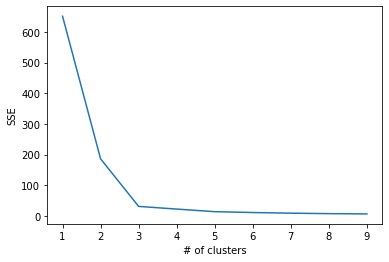

In [40]:
sse = []
k_range = range(1,10,1)
for i in k_range:
    #print(i)
    km = KMeans(n_clusters = i)
    km.fit(df)
    sse.append(km.inertia_)

plt.plot(k_range,sse)
plt.xlabel('# of clusters')
plt.ylabel('SSE')




In [41]:
scaler = MinMaxScaler()

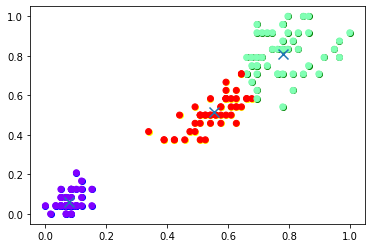

In [49]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

km = KMeans(n_clusters = 3)
km.fit(df)
y_predicted = km.predict(df)
y_predicted
df['cluster'] = y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
cluster_centers = km.cluster_centers_
plt.scatter(df['petal length (cm)'],df['petal width (cm)'], c=y_predicted, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cmap='rainbow', marker='x', s=100)

0      0.067797
1      0.067797
2      0.050847
3      0.084746
4      0.067797
         ...   
145    0.711864
146    0.677966
147    0.711864
148    0.745763
149    0.694915
Name: petal length (cm), Length: 150, dtype: float64